## Example: Logistic Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from scratch.algos.logistic import LogisticRegression
from scratch.utils.evaluation import *

plt.rcParams["figure.figsize"] = (20, 10)
sns.set(font_scale=2)
sns.set_style("whitegrid")

In [2]:
cancer = (
    pd.read_csv("../data/BreastCancer.csv", header=0)
    .sample(frac=1)
    .dropna(axis=0)
    .drop(columns=["id"])
    .replace({"diagnosis": {"M": 1, "B": 0}})
)
cancer = cancer[["diagnosis", "radius_mean"]] # testing with a single predictor
print("Dimensions:", cancer.shape)
print("Columns:", cancer.columns)

nvalid = int(np.floor(cancer.shape[0] * 0.2))

scaler = StandardScaler()

dftrain = cancer.head(n=-nvalid)
Xtrain = dftrain.drop(columns=["diagnosis"]).to_numpy()
XtrainS = scaler.fit_transform(Xtrain)
ytrain = dftrain["diagnosis"].values

dfvalid = cancer.tail(n=nvalid)
Xvalid = dfvalid.drop(columns=["diagnosis"]).to_numpy()
XvalidS = scaler.transform(Xvalid)
yvalid = dfvalid["diagnosis"].values

Dimensions: (567, 2)
Columns: Index(['diagnosis', 'radius_mean'], dtype='object')


In [3]:
m = LogisticRegression(learning_rate=0.01, tol_err=1e-06, max_iters=10000)
m.fit(X=XtrainS, y=ytrain)

print("Feature weights:", m.weights)
print("Bias term:", m.bias)
print("Number of iterations:", m.iters)

yprob_train, yclass_train = m.predict(X=XtrainS, threshold=0.5)
yprob_valid, yclass_valid = m.predict(X=XvalidS, threshold=0.5)

Feature weights: [3.17733398]
Bias term: -0.6062703618275942
Number of iterations: 6708


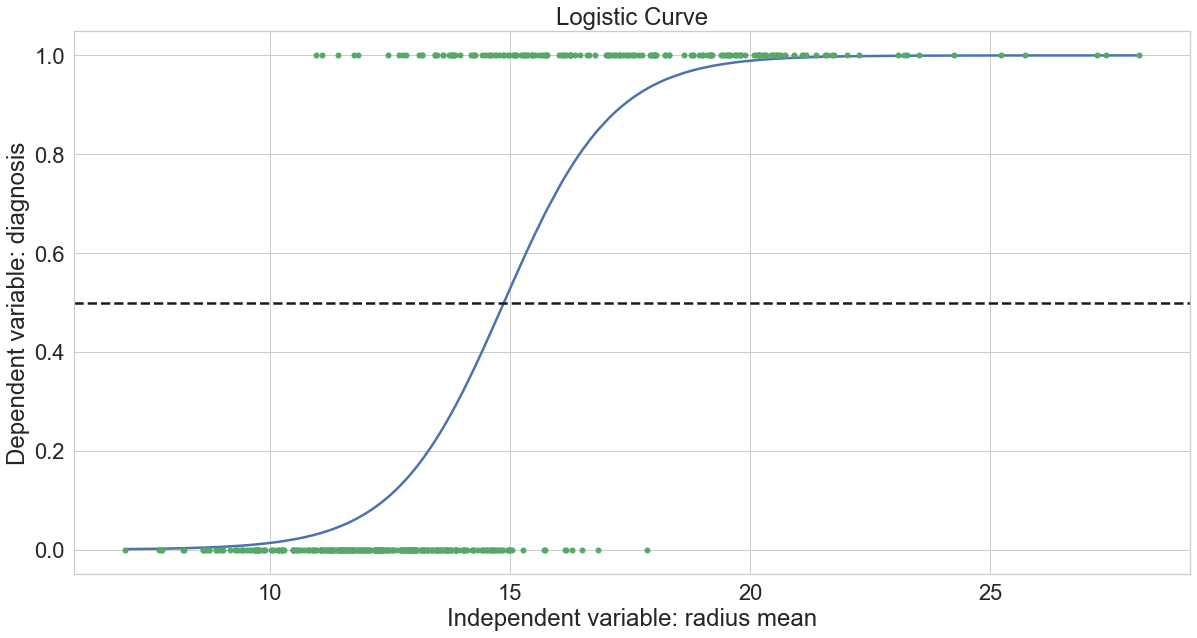

In [4]:
# logistic curve
dftrainplt = dftrain.copy()
dftrainplt["prediction"] = yprob_train
dftrainplt.sort_values(by="radius_mean", inplace=True)
plt.plot(dftrainplt.radius_mean.values, dftrainplt.prediction.values, "-", c="b", lw=2.5)
plt.plot(dftrainplt.radius_mean.values, dftrainplt.diagnosis.values, "o", c="g", ms=5)
plt.axhline(0.5, c="k", ls="--", lw=2.5)
plt.xlabel("Independent variable: radius mean")
plt.ylabel("Dependent variable: diagnosis")
plt.title("Logistic Curve")
plt.show()

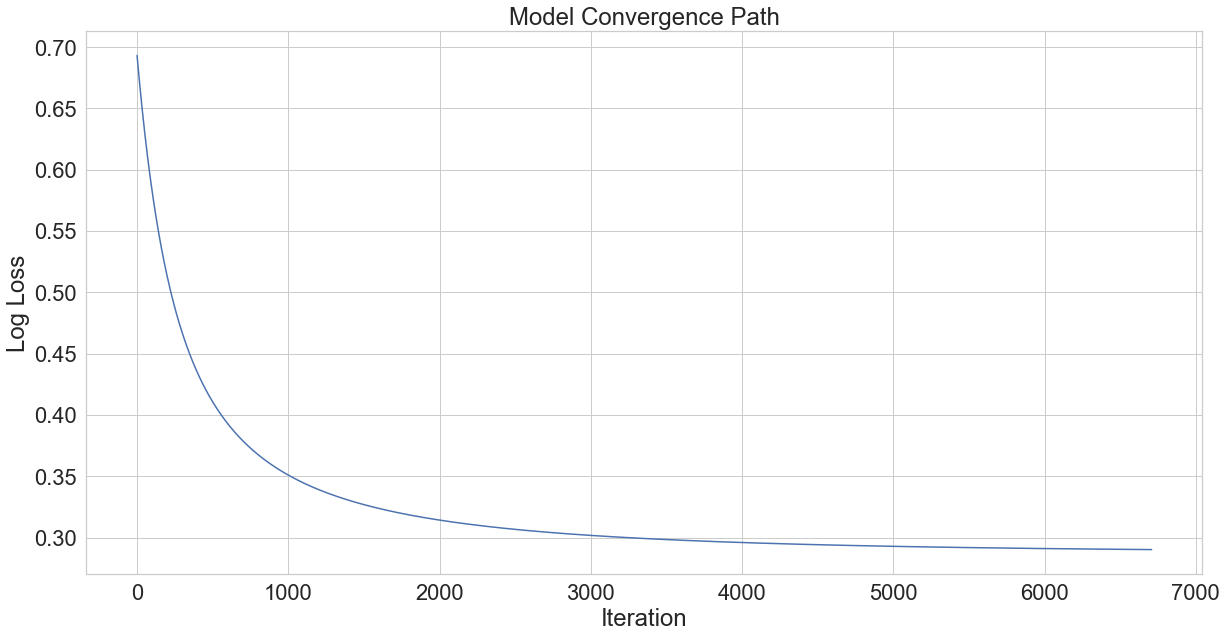

In [5]:
# convergence_plot
plt.plot(range(len(m.loss)), m.loss)
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.title("Model Convergence Path")
plt.show()

In [6]:
build_confusion_matrix(y=ytrain, yhat=yclass_train, as_percentage=False)

YHAT,0,1
Y,,
0,267,15
1,38,134


In [7]:
build_confusion_matrix(y=yvalid, yhat=yclass_valid, as_percentage=False)

YHAT,0,1
Y,,
0,71,4
1,9,29
